<a href="https://colab.research.google.com/github/fawziafaraag/machine-learning-II/blob/main/lab1_machine_learning(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

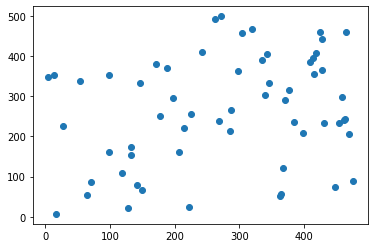

In [66]:
import matplotlib.pyplot as plt
import random
x =random.sample(range(1, 500), 60)
y =random.sample(range(1, 500), 60)

plt.scatter(x, y)
plt.show()

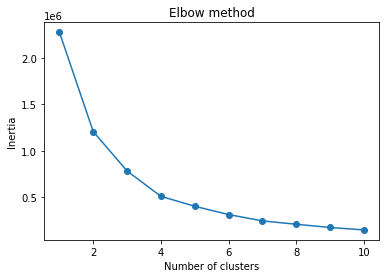

In [67]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

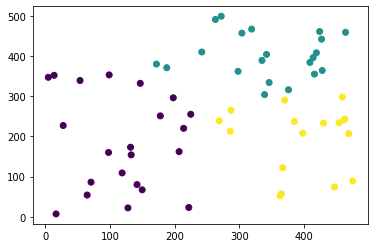

In [68]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

#Implementation kmeans

import liberiers and upload data

In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


In [70]:
# dictionary of lists  
dict = {'x': x, 'y': y}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('kmeans_xy.csv') 

In [71]:
data= pd.read_csv('kmeans_xy.csv')
colnames = list(data.columns[1:3])
data.head()

,Unnamed: 0,x,y
0,0,304,457
1,1,363,52
2,2,463,243
3,3,263,491
4,4,385,237


In [72]:
colnames

['x', 'y']

In [73]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(24)
k=3
df = data[['x','y']]
centroids = initiate_centroids(k, df)
centroids

,x,y
46,133,154
30,376,316
59,147,332


Step 3 - Calculate distance

In [74]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

In [75]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 131044.00
Error for centroid 1: 6397600225.00
Error for centroid 2: 650556036.00


Step 4 - Assign centroids


In [76]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [77]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

,x,y,centroid,error
0,304,457,1,6.282542e+08
1,363,52,0,4.007396e+09
2,463,243,1,1.663584e+08
3,263,491,2,1.500555e+09
4,385,237,1,3.996768e+07


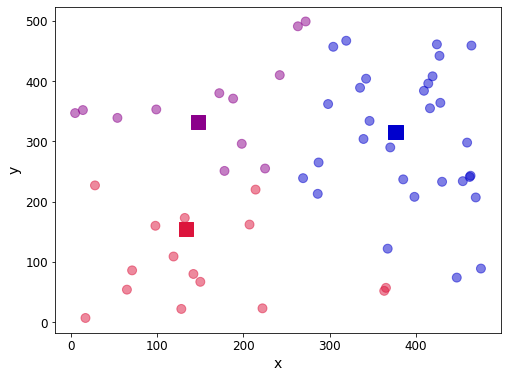

In [78]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [79]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 30326425869.00


Step 5 - Update centroid location


In [80]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,x,y
0,153.375000,103.312500
1,389.709677,306.290323
2,158.230769,359.692308


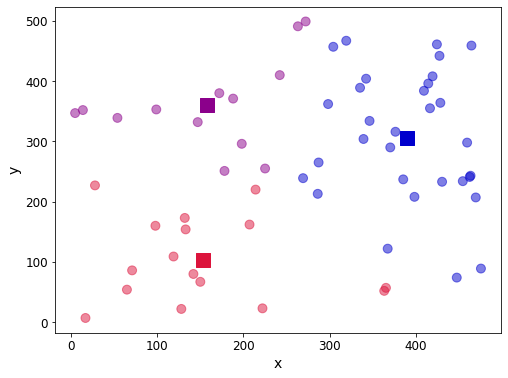

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Step 6 - Repeat steps 3-5

In [82]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids


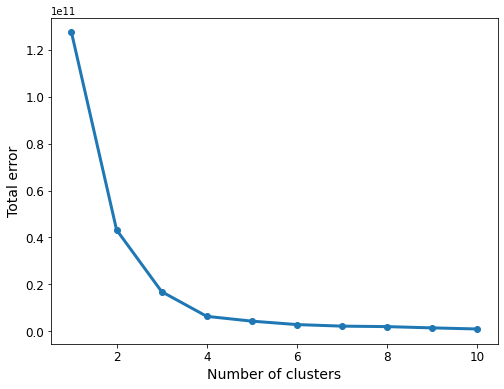

In [83]:
err_total = []
n = 10

df_elbow = data[['x','y']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [84]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['x','y']], 4)
df.head()

,x,y,centroid,error
0,304,457,0,4.186197e+07
1,363,52,1,3.597372e+08
2,463,243,1,3.960756e+07
3,263,491,0,3.179439e+08
4,385,237,1,1.852464e+07


In [85]:
centroids

,x,y
0,360.350000,399.600000
1,415.928571,179.142857
2,123.666667,91.416667
3,148.428571,301.928571


In [86]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta","green"])

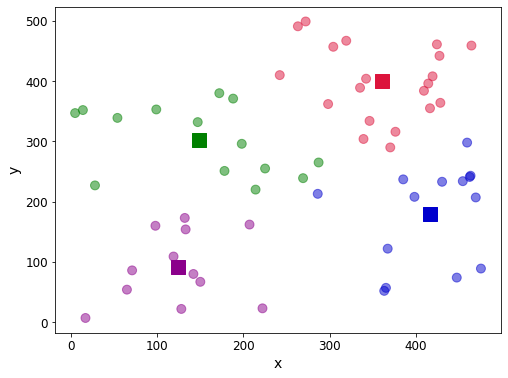

In [87]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)

plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2,3], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()